<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import scannerpy 
import scannertools as st
import os
from esper.prelude import load_frame
from query.models import Video
import numpy as np
import cv2

In [2]:
db = scannerpy.Database()

In [3]:
# video = st.Video("movies/star_wars_the_force_awakens_2015.mp4")
video = Video.objects.filter(name='star wars the force awakens').all()[0]
# video = Video.objects.filter(name='big hero 6').all()[0]

In [ ]:
hsv_histograms = st.histograms.compute_hsv_histograms(db, videos=[video.for_scannertools()], megabatch=1)

Executing 1 jobs
Megabatch 1/1


  0%|                                                                                                                                                                                | 0/1553 [00:03<?, ?it/s, jobs=1, workers=1, tasks=1553]

In [3]:
frame_num = 22608
# frame_num = 89727
# frame_num = 132164

In [5]:
faces = st.face_detection.detect_faces(
    db, videos=[video.for_scannertools()], frames=[[frame_num]], cache=False)

Executing 1 jobs
Megabatch 1/1


  0%|                                                                                                                                                                                      | 0/1 [00:03<?, ?it/s, tasks=1, jobs=1, workers=1]

Loading model...


  0%|                                                                                                                                                                                      | 0/1 [00:04<?, ?it/s, tasks=1, jobs=1, workers=1]

Model loaded!


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.79s/it, tasks=0, jobs=1, workers=0]


In [6]:
list(faces[0].load())

[[x1: 0.2669791579246521
  y1: 0.038990460336208344
  x2: 0.6535152792930603
  y2: 0.999586284160614
  score: 0.9998303651809692]]

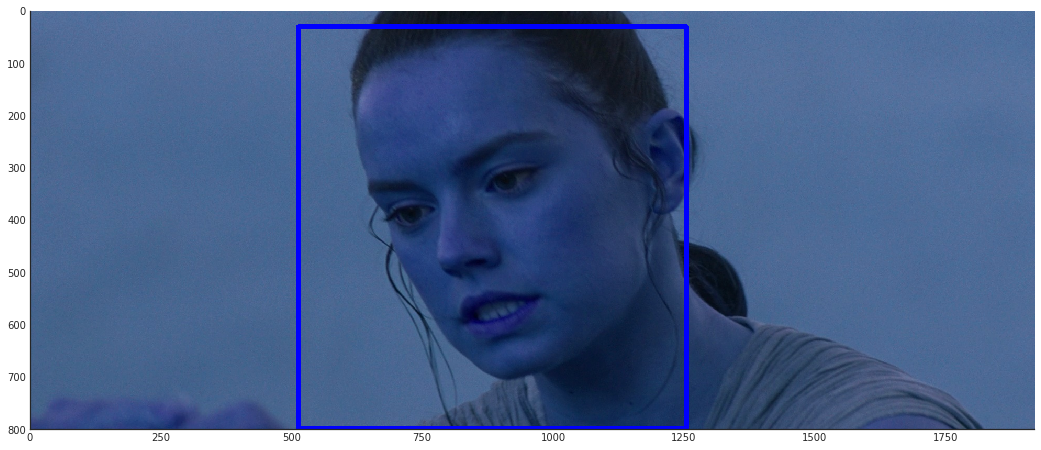

In [7]:
import matplotlib.pyplot as plt
plt.imshow(load_frame(video, 
                      frame_num, 
                      [{'bbox_x1': bbox.x1, 'bbox_x2': bbox.x2, 'bbox_y1': bbox.y1, 'bbox_y2': bbox.y2} 
                                 for bbox in next(faces[0].load())]))

In [14]:
frame = load_frame(video, frame_num, [])

In [11]:
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2YUV)

# Calculate the mean value of the intensity channel
brightness = np.mean(frame, axis=(0,1))[0]

In [13]:
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2YUV)

(h, w, c) = frame.shape
intensities = frame.reshape((h * w * c))[::3]

# Calculate the average intensity
average_intensity = np.mean(intensities)
contrast = np.sqrt(np.mean((intensities - average_intensity) ** 2))

In [15]:
cv2.Laplacian(frame, cv2.CV_64F).var()

26.710570207831317

In [6]:
print(frame.shape)

(800, 1920, 3)


In [7]:
(h, w, c) = frame.shape

In [8]:
average_third_channel = np.mean([c[2] for h in frame for c in h])

In [14]:
print(average_third_channel)

128.924755859


In [17]:
print(np.mean(frame, axis=(0,1))[2])

128.924755859


In [24]:
print(frame)

[[[ 89 110 155]
  [ 89 110 155]
  [ 87 110 155]
  ..., 
  [ 83 114 159]
  [ 84 113 158]
  [ 79 108 153]]

 [[ 88 109 154]
  [ 89 110 155]
  [ 89 112 157]
  ..., 
  [ 83 114 159]
  [ 82 111 156]
  [ 88 117 162]]

 [[ 83 106 151]
  [ 86 109 154]
  [ 89 112 157]
  ..., 
  [ 82 113 158]
  [ 82 111 156]
  [ 84 113 158]]

 ..., 
 [[ 46  62 121]
  [ 46  62 121]
  [ 47  63 122]
  ..., 
  [ 82 104 146]
  [ 83 105 147]
  [ 85 107 149]]

 [[ 43  60 117]
  [ 45  62 119]
  [ 47  64 121]
  ..., 
  [ 84 108 150]
  [ 84 108 150]
  [ 83 107 149]]

 [[ 43  60 117]
  [ 46  63 120]
  [ 48  65 122]
  ..., 
  [ 78 103 145]
  [ 77 102 144]
  [ 74  99 141]]]


In [21]:
(h, w, c) = frame.shape
oned = frame.reshape((h * w * c))

In [25]:
print(oned[::3])

[89 89 87 ..., 78 77 74]


In [26]:
avg = np.mean(oned[::3])

In [28]:
avg

60.843727864583336

In [31]:
(oned[::3] - avg) ** 2

array([ 792.77566056,  792.77566056,  684.15057202, ...,  294.33767358,
        261.02512931,  173.0874965 ])

In [30]:
np.sqrt(np.mean((oned[::3] - avg) ** 2))

22.437497582611396

In [4]:
image = load_frame(video, frame_num, [])

In [15]:
cv2.Laplacian(image, cv2.CV_64F).var()

26.710570207831317

In [14]:
cv2.mean(cv2.pow(cv2.meanStdDev(cv2.Laplacian(image, cv2.CV_64F))[1], 2))

(26.710570188179577, 0.0, 0.0, 0.0)

In [11]:
image[:, :, ::-1].transpose(2, 0, 1).astype(np.float32) * (1.0 / 255.0)

array([[[ 0.60784316,  0.60784316,  0.60784316, ...,  0.62352943,
          0.61960787,  0.60000002],
        [ 0.60392159,  0.60784316,  0.6156863 , ...,  0.62352943,
          0.61176473,  0.63529414],
        [ 0.59215689,  0.60392159,  0.6156863 , ...,  0.61960787,
          0.61176473,  0.61960787],
        ..., 
        [ 0.47450984,  0.47450984,  0.4784314 , ...,  0.57254905,
          0.57647061,  0.58431375],
        [ 0.45882356,  0.4666667 ,  0.47450984, ...,  0.58823532,
          0.58823532,  0.58431375],
        [ 0.45882356,  0.47058827,  0.4784314 , ...,  0.56862748,
          0.56470591,  0.5529412 ]],

       [[ 0.43137258,  0.43137258,  0.43137258, ...,  0.44705886,
          0.44313729,  0.42352945],
        [ 0.42745101,  0.43137258,  0.43921572, ...,  0.44705886,
          0.43529415,  0.45882356],
        [ 0.41568631,  0.42745101,  0.43921572, ...,  0.44313729,
          0.43529415,  0.44313729],
        ..., 
        [ 0.24313727,  0.24313727,  0.24705884, ...,